# Nuclei Segmentation using Voronoi-Otsu-Labeling
In this notebook, we perform nuclei segmentation on a given image using the Voronoi-Otsu-Labeling method from the `napari-segment-blobs-and-things-with-membranes` library. The following steps will guide you through the process.

In [1]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from skimage.io import imread
from skimage import color
import stackview


/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/napari_tools_menu/__init__.py:10: UserWarning: Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.
  warnings.warn("Importing QT failed; now introducing dummy definitions of QMenu class and register_function decorator.")


## Step 1: Load the Image
We load the image `human_mitosis_small.png` from disk and extract the first channel for analysis.

In [2]:
filename = 'human_mitosis_small.png'
image = imread(filename)
image_channel = image[..., 0]  # Extract the first channel

## Step 2: Apply Voronoi-Otsu-Labeling
We apply Voronoi-Otsu-Labeling to the extracted image channel to segment the nuclei.

In [3]:
labels = nsbatwm.voronoi_otsu_labeling(image_channel, spot_sigma=3.5, outline_sigma=1)

## Step 3: Visualize the Segmented Labels
We visualize the segmented labels using `stackview`.

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
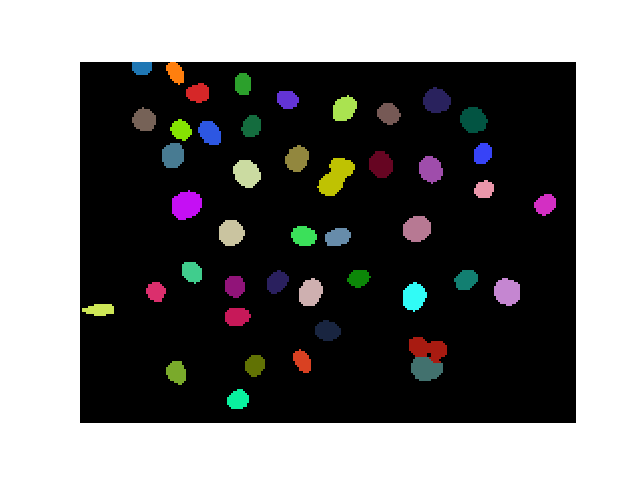

In [4]:
stackview.insight(labels)

## Step 4: Save the Segmented Image
Finally, we convert the label image to RGB and save it as a PNG file.

In [5]:
rgb_labels = color.label2rgb(labels, bg_label=0).astype('uint8')
filename_output = 'segmented_nuclei.png'
stackview.export_image(rgb_labels, filename_output)
print(f'Segmented image saved as {filename_output}')

AttributeError: module 'stackview' has no attribute 'export_image'